In [ ]:
# 다음 증권 정보에서 -> 특정 업체의 주가를 다운로드
# pandas를 이용해 분석
# dead cross, golden cross를 그래프로 그려보기

In [ ]:
# 검사에서 f1 클릭 후 disable javascript 선택 후 새로고침하면 크롤링 불가능한거 안나옴
# network에서 clearance 후 작동시 나오는 데이터가 내가 원하는 것

In [ ]:
# 1. 다음 증권 사이트에서 데이터 수집
# 2. 

In [57]:
import requests
import json
import pandas as pd
import time

In [10]:
url = "http://finance.daum.net/api/quote/A005930/days"

In [3]:
req = requests.get(url)

In [ ]:
data=get_stock_data("A005930",1)
if data:
    json_data=json.loads(data)
    stock_data = pd.DataFrame(json_data['data'])
    total_Pages =  int(json_data['totalPages'])
    for page in range(2, total_Pages+1):
        time.sleep(1)
        data=get_stock_data("A005930",page)
        json_data=json.loads(data)
        stock_data = pd.concat([stock_data,pd.DataFrame(json_data['data'])])
stock_data.head()

In [60]:
stock_data.head()
# 시고저종 - 시가, 고가, 저가, 종가

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume
0,A005930,2020-01-30 15:30:23,57200.0,15:30:23,FALL,1900.0,-0.032149,59100.0,KOREA,58800.0,58800.0,56800.0,1197261686900,20723576,1197261686900,20723576
1,A005930,2020-01-29 15:30:24,59100.0,15:30:24,RISE,300.0,0.005102,58800.0,KOREA,59100.0,59700.0,58800.0,975344481100,16446102,975344481100,16446102
2,A005930,2020-01-28 15:30:29,58800.0,15:30:29,FALL,2000.0,-0.032895,60800.0,KOREA,59400.0,59400.0,58300.0,1394361672900,23664541,1394361672900,23664541
3,A005930,2020-01-23 15:30:12,60800.0,15:30:12,FALL,1500.0,-0.024077,62300.0,KOREA,61800.0,61800.0,60700.0,912319470070,14916555,912319470070,14916555
4,A005930,2020-01-22 15:30:01,62300.0,15:30:01,RISE,900.0,0.014658,61400.0,KOREA,60500.0,62600.0,60400.0,943882357729,15339565,943882357729,15339565


In [ ]:
stock_data.info()

In [63]:
# 1. 전처리 - 날짜 데이터가 날짜 형태가 아니라서 -> 형변환
# 원하는 열을 형변환 한다.
# 원하는 열을 선택해서 형변환 한다.
stock_data["date"] = pd.to_datetime(stock_data["date"],
                                    format="%Y-%m-%d %H:%M:%S",
                                    errors="coerce")

In [64]:
stock_data["date"]

0    2020-01-30 15:30:23
1    2020-01-29 15:30:24
2    2020-01-28 15:30:29
3    2020-01-23 15:30:12
4    2020-01-22 15:30:01
             ...        
87   1983-05-10 00:00:00
88   1983-05-09 00:00:00
89   1983-05-06 00:00:00
90   1983-05-04 00:00:00
91   1983-05-03 00:00:00
Name: date, Length: 8892, dtype: datetime64[ns]

In [69]:
#2. 인덱스 설정
# * 판다스의 메서드들은 대부분 원본은 그대로 두고, 복사본을 준다. 
# stock_data = stock_data.set_index('date') 아래와 같은 방법(데이터 원본을 수정)
# stock_data.set_index('date',inplace=True)
# stock_data.index \ stock_data['index']

In [73]:
# 3. 정렬하기
stock_data = stock_data.sort_index()

In [76]:
# 4. 이동평균 데이터 구하기
stock_data['tradePrice'].rolling(window=5).mean()

date
1983-05-03 00:00:00        NaN
1983-05-04 00:00:00        NaN
1983-05-06 00:00:00        NaN
1983-05-09 00:00:00        NaN
1983-05-10 00:00:00     4670.4
                        ...   
2020-01-22 15:30:01    61620.0
2020-01-23 15:30:12    61640.0
2020-01-28 15:30:29    61140.0
2020-01-29 15:30:24    60480.0
2020-01-30 15:30:23    59640.0
Name: tradePrice, Length: 8892, dtype: float64

In [77]:
# 5. 새로운 열을 만들어서 데이터 저장하기
stock_data['5일이평'] = stock_data['tradePrice'].rolling(window=5).mean()

In [81]:
# 30일이평, 60일이평 계산해서 저장하기
stock_data['30일이평'] = stock_data['tradePrice'].rolling(window=30).mean()
stock_data['60일이평'] = stock_data['tradePrice'].rolling(window=60).mean()

In [ ]:
np.nan #Not a Number -> 결측치
# 전처리 -> 결측치 처리
# 1. 결측치가 있는 데이터(열,행) 지운다.
# 2. 특정 값으로 채운다.
# 2-1. 대표값으로 채운다 - 전체 데이터의 평균
# 2-2. 끌어다 채우기 -> 앞, 전 열(행)의 값을 끌어다 채우기
# 2-3. 유추값으로 채우기
np.inf #infinite

In [ ]:
# 6. 단>장 - 단<장
# 6. 단<장 - 단>장

In [87]:
stock_data['5일이평_prev']=stock_data['5일이평'].shift(1)

In [90]:
stock_data['30일이평_prev']=stock_data['30일이평'].shift(1)

In [91]:
stock_data['60일이평_prev']=stock_data['60일이평'].shift(1)

In [94]:
# 열 데이터 비교하기
# 어제는 단기이평이 장기 이평보다 낮고, 오늘은 단기이평이 장기 이평보다 높다.
golden = (stock_data['5일이평_prev'] < stock_data['30일이평_prev']) & (stock_data['5일이평'] > stock_data['30일이평'])

In [ ]:
# 7. 원하는 조건에 맞는 열만 찾아보기
stock_data[golden == True]

In [99]:
# 어제는 단기이평이 장기 이평보다 높고, 오늘은 단기이평이 장기 이평보다 낮다.
dead = (stock_data['5일이평_prev'] > stock_data['30일이평_prev']) & (stock_data['5일이평'] < stock_data['30일이평'])

In [ ]:
stock_data[dead == True]

In [101]:
stock_data['golden'] = golden
stock_data['dead'] = dead

In [ ]:
# 8. 처음으로 주가가 만원이 넘은날 찾기
stock_data[stock_data['tradePrice']>10000]

In [103]:
import matplotlib
import matplotlib.pyplot as plt

In [104]:
# 폰트 변경
plt.rc('font',family = 'Gulim')

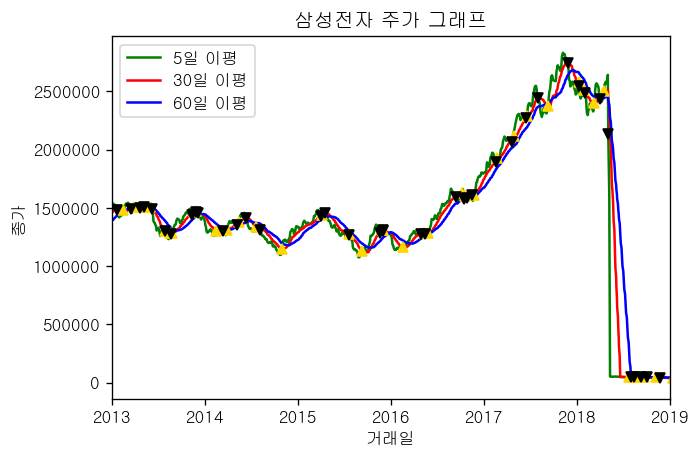

In [119]:
# 해상도
plt.figure(dpi=120)
# 선그래프
plt.plot(stock_data.index,stock_data['5일이평'], 'g',label="5일 이평")
plt.plot(stock_data.index,stock_data['30일이평'], 'r', label="30일 이평")
plt.plot(stock_data.index,stock_data['60일이평'], 'b', label="60일 이평")
# cross발생 지점 표시하기
plt.plot(stock_data.loc[stock_data.golden==True].index,
         stock_data['5일이평'][stock_data.golden==True], 
         '^',c='gold')
plt.plot(stock_data.loc[stock_data.dead==True].index,
         stock_data['5일이평'][stock_data.dead==True], 
         'v',c='k')
# 데이터 범위
plt.xlim(["2013-01-01","2019-01-01"])
# 범례 표시
plt.legend(loc='best')
plt.xlabel("거래일")
plt.ylabel("종가")
plt.title("삼성전자 주가 그래프")
plt.savefig("samsung.png")

In [89]:
stock_data.head(10)

,symbolCode,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,5일이평,30일이평,60일이평,5일이평_prev
date,,,,,,,,,,,,,,,,,,,
1983-05-03,A005930,4509.0,00:00:00,EVEN,0.0,0.0,4509.0,KOREA,4553.0,4575.0,4486.0,0,115399,0,115399,NaN,NaN,NaN,NaN
1983-05-04,A005930,4717.0,00:00:00,EVEN,0.0,0.0,4717.0,KOREA,4509.0,4753.0,4469.0,0,90275,0,90275,NaN,NaN,NaN,NaN
1983-05-06,A005930,4731.0,00:00:00,EVEN,0.0,0.0,4731.0,KOREA,4708.0,4820.0,4668.0,0,153850,0,153850,NaN,NaN,NaN,NaN
1983-05-09,A005930,4820.0,00:00:00,EVEN,0.0,0.0,4820.0,KOREA,4775.0,4851.0,4775.0,0,150338,0,150338,NaN,NaN,NaN,NaN
1983-05-10,A005930,4575.0,00:00:00,EVEN,0.0,0.0,4575.0,KOREA,4780.0,4797.0,4535.0,0,64025,0,64025,4670.4,NaN,NaN,NaN
1983-05-11,A005930,4478.0,00:00:00,EVEN,0.0,0.0,4478.0,KOREA,4531.0,4531.0,4442.0,0,55358,0,55358,4664.2,NaN,NaN,4670.4
1983-05-12,A005930,4349.0,00:00:00,EVEN,0.0,0.0,4349.0,KOREA,4442.0,4442.0,4313.0,0,66749,0,66749,4590.6,NaN,NaN,4664.2
1983-05-13,A005930,4353.0,00:00:00,EVEN,0.0,0.0,4353.0,KOREA,4375.0,4486.0,4349.0,0,122806,0,122806,4515.0,NaN,NaN,4590.6
1983-05-16,A005930,4171.0,00:00:00,EVEN,0.0,0.0,4171.0,KOREA,4286.0,4286.0,4131.0,0,49482,0,49482,4385.2,NaN,NaN,4515.0


In [102]:
stock_data.to_excel("A005930.xlsx")

In [53]:
def get_stock_data(code,page=1):
    options = {
        "symbolCode": code, #주가코드
        "page":page, #페이지
        "perPage":"100", #한페이지에 몇개 불러올건가
        "pagination":"true" # 몇페이지까지 있는지, 몇개 있는지 확인 가능

    }
    custom_headers = {
        "referer":"http://finance.daum.net/quotes/",
        "user-agent":"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"
    }
    req = requests.get(url,headers=custom_headers, params=options)
    if req.status_code == requests.codes.ok:
        return req.text
    else:
        return False


In [42]:
json_data['totalPages']

89

In [43]:
json_data['currentPage']

1

In [46]:
stock_data = pd.DataFrame(json_data['data'])

In [48]:
stock_data.head()

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume
0,A005930,2020-01-30 15:30:23,57200.0,15:30:23,FALL,1900.0,-0.032149,59100.0,KOREA,58800.0,58800.0,56800.0,1195873843300,20699313,1195873843300,20699313
1,A005930,2020-01-29 15:30:24,59100.0,15:30:24,RISE,300.0,0.005102,58800.0,KOREA,59100.0,59700.0,58800.0,975344481100,16446102,975344481100,16446102
2,A005930,2020-01-28 15:30:29,58800.0,15:30:29,FALL,2000.0,-0.032895,60800.0,KOREA,59400.0,59400.0,58300.0,1394361672900,23664541,1394361672900,23664541
3,A005930,2020-01-23 15:30:12,60800.0,15:30:12,FALL,1500.0,-0.024077,62300.0,KOREA,61800.0,61800.0,60700.0,912319470070,14916555,912319470070,14916555
4,A005930,2020-01-22 15:30:01,62300.0,15:30:01,RISE,900.0,0.014658,61400.0,KOREA,60500.0,62600.0,60400.0,943882357729,15339565,943882357729,15339565


In [49]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
symbolCode           100 non-null object
date                 100 non-null object
tradePrice           100 non-null float64
tradeTime            100 non-null object
change               100 non-null object
changePrice          100 non-null float64
changeRate           100 non-null float64
prevClosingPrice     100 non-null float64
exchangeCountry      100 non-null object
openingPrice         100 non-null float64
highPrice            100 non-null float64
lowPrice             100 non-null float64
accTradePrice        100 non-null int64
accTradeVolume       100 non-null int64
periodTradePrice     100 non-null int64
periodTradeVolume    100 non-null int64
dtypes: float64(7), int64(4), object(5)
memory usage: 10.6+ KB


In [21]:
# 바구니 객체 - 딕셔너리
# 사전형 객체 - 사전, 
# 키:값 - key:value
test_dict = {}
test_dict = dict()
test_dict = {
    "a":"apple",
    "b":"banana",
    "o":"orange",
    99:"hi",
    "hello":"greeting"
}

In [23]:
test_dict["b"] = "test"

In [24]:
test_dict #dict는 순서가 없다.

{'a': 'apple', 'b': 'test', 'o': 'orange', 99: 'hi', 'hello': 'greeting'}

In [25]:
test_dict.update({"c":"carvena"})

In [27]:
test_dict["new"] = "new value"

In [29]:
# del - 메모리 해제
del(test_dict["c"])

In [33]:
"new value" in test_dict

False

In [41]:
for key in test_dict:
    print(test_dict[key])

apple
test
orange
hi
greeting
new value


In [36]:
test_dict.keys()

dict_keys(['a', 'b', 'o', 99, 'hello', 'new'])

In [38]:
test_dict.values()

dict_values(['apple', 'test', 'orange', 'hi', 'greeting', 'new value'])

In [39]:
test_dict.items()

dict_items([('a', 'apple'), ('b', 'test'), ('o', 'orange'), (99, 'hi'), ('hello', 'greeting'), ('new', 'new value')])

In [40]:
for key,value in test_dict.items():
    print(key,value)

a apple
b test
o orange
99 hi
hello greeting
new new value


In [ ]:
# response : 사이트에서 주는 정보
# request  : 내가 주는 정보
# Reffer : 정보를 요청한 사이트
# User - Agent : 나의 OS, 브라우저 정보
# => Reffer, User-Agent 정보를 보내줘야함